# PCO. Mod√©lisation IA (strat√©gies suppl√©mentaires)
## Comp√©tences C5. C6.

<img src='Ressources_NB/IllustrationModel2.png'>
    
Ce fichier contient les mod√©lisation IA √† partir des donn√©es trait√©es en amont durant l'analyse. A la diff√©rence de la premi√®re s√©rie de mod√©lisation, ce notebook pr√©sente diff√©rentes strat√©gies de r√©√©quilibrage des classes afin d'√©ventuellement am√©liorer le score *Recall* au d√©triment du *Log Loss*. Ces mod√®les ne seront pas retenus pour l'intr√©gation dans l'application. 

## Comp√©tences
* **C5.** Concevoir le programme d‚Äôintelligence artificielle adapt√© aux donn√©es disponibles afin de r√©pondre aux objectifs fonctionnels du projet, √† l‚Äôaide des algorithmes, outils et m√©thodes standards, notamment de machine learning et de deep learning.
* **C6.** D√©velopper le programme d‚Äôintelligence artificielle selon les donn√©es du projet et les √©l√©ments de conception d√©finis, en exploitant les algorithmes et les outils standards couramment utilis√©s dans le domaine.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


## Importation des Fichiers

In [12]:
# Librairies standards de data-analyses:
    
import numpy as np
from numpy import set_printoptions
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import math


# sklearn modules Preprocessing:
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Samples processing:

from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import TomekLinks


# sklearn modules Model Selection:

from sklearn import tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

import xgboost
from xgboost import XGBClassifier

#import lightgbm
#from lightgbm import LGBMClassifier


# sklearn modules Model Evaluation & Improvement:
    
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import learning_curve

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import model_selection

from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import make_scorer, recall_score, log_loss, matthews_corrcoef
from sklearn.metrics import average_precision_score
from sklearn.pipeline import make_pipeline


# R√©seaux de neurones Tensorflow Keras:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
#from keras import backend as K


# Librairies standards de data-visualisation:

import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
from IPython.display import display
pd.options.display.max_columns = None
from dateutil.relativedelta import relativedelta
import datetime
from datetime import date, datetime
import re
import joblib


# Filtre warnings:

import warnings 
warnings.filterwarnings("ignore")


# Coloration des graphes:

red = '#fd8181'
blue = '#8198fd'

## Fonctions
### Fonctions de Preprocessing

In [5]:
# Fonction d√©tection des valeurs manquantes:
def find_NaN(dataset):
    NaN = dataset.isnull().sum().to_frame('Valeurs Manquantes')
    NaN = NaN.loc[NaN['Valeurs Manquantes']>0]
    NaN['Pourcentage'] = [str(round((i*100)/len(dataset),1)) for i in NaN['Valeurs Manquantes']]
    NaN['Pourcentage'] = [i+' %' for i in NaN['Pourcentage']]
    if NaN.empty:
        return print(f'Aucune valeur manquante n\'est d√©tect√©e sur ce dataset')
    else:
        return NaN
    
# Fonction transformation date str(YYYY-MM-DD) en int(YYYYMMDD):    
def Format_intdate(serie):
    Liste = []
    for i in serie:
        y = i[:4]
        m = i[5:7]
        d = i[8:]
        i = f'{y}{m}{d}'
        i = int(i)
        Liste.append(i)

    return Liste

# Proportion Churn:
def ratio_churn(dataset, name):
    ratio = dataset['is_churn'].value_counts()[1]/len(dataset['is_churn'])
    print(f'Proportion d√©sabonn√©s sur {name} :\t{round(ratio*100,2)} %')
    
def proportion_churn(dataset, target):
    labels = ['Abonn√©s', 'D√©sabonn√©s']
    colors = [blue, red]
    explode = (0, 0.2)
 
    fig, ax = plt.subplots()
    ax.pie(dataset[target].value_counts(), startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode = explode, shadow=True)
    ax.set_title('Proportion d\'attrition', fontweight='bold')
   
    fig.set_figheight(5)
    fig.set_figwidth(5)
    fig.legend(loc='lower right', labels=labels, fontsize='medium')
    fig.tight_layout()

### Fonctions d'√©valuation des mod√®les

In [6]:
# Comparaison Mod√®les:
def compare_model(results, score, names):
    Table = pd.DataFrame(columns=names)
    for i,j in zip(Table.columns, results):
        Table[i] = j
    
    plt.figure(figsize=(20,6))  
    sn.boxplot(data=Table.loc[:, names], palette="Set3", linewidth=2.5, orient="h")
    
    plt.ylabel(f'\n Mod√®les utilis√©s\n',horizontalalignment="center",fontstyle = "normal",fontsize = "large", fontfamily = "sans-serif")
    plt.xlabel(f'{score} Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
    plt.title(f'Comparaison {score} \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.yticks(rotation=0, horizontalalignment="right")
    plt.grid(True)
    plt.show()
    
    
# V√©rification saturation de donn√©es:
def learning_Model(model, name):    
    N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.1, 1.0, 7), cv = StratifiedKFold(4), scoring = 'f1')
    
    plt.figure(figsize = (12, 7))
    plt.plot(N, train_score.mean(axis=1), '-o', label = 'train')
    plt.fill_between(N, train_score.max(axis=1), train_score.min(axis=1), alpha=0.3)
    plt.plot(N, val_score.mean(axis=1), '-o', label = 'validation')
    plt.fill_between(N, val_score.max(axis=1), val_score.min(axis=1), alpha=0.3)
    plt.title(f'Historique de l\'apprentissage {name}\n')
    plt.ylabel('Score (F1)')
    plt.xlabel('Samples')
    plt.legend()

    plt.show()
    
# Entrainement et Evaluation du mod√®le
def First_Evaluation(name):
    print(f'Evaluation sur {name}')

    plt.figure(figsize = (7, 5))
    df_cm = confusion_matrix(y_valid, y_pred) 
    group_names = ["True Neg\n", "False Pos\n", "False Neg\n", "True Pos\n"]
    group_counts = ["{0:0.0f}\n".format(value) for value in df_cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in df_cm.flatten()/np.sum(df_cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.set(font_scale=1.4)
    sn.heatmap(df_cm, annot=labels, fmt="", cmap='mako').set_title('Confusion matrix Validation\n')
    class_names=[0,1]
    tick_marks = np.arange(len(class_names))
    plt.tight_layout()

    plt.ylabel('Actual label')
    plt.xlabel('Predicted label\n')
    plt.show()
    
    predictions_result = pd.DataFrame(columns = ['True', 'Probability', 'Prediction'])
    predictions_result['True'] = y_valid.tolist()
    predictions_result['Probability'] = probability.tolist()
    predictions_result['Prediction'] = y_pred.tolist()
    
    try :
        predictions_result_o = predictions_result.loc[predictions_result['Probability']>0.9]
        certitude_1 = round(predictions_result_o['True'].value_counts()[1]/len(predictions_result_o['True']),2)
        predictions_result_u = predictions_result.loc[predictions_result['Probability']<0.1]
        certitude_0 = round(predictions_result_u['True'].value_counts()[0]/len(predictions_result_u['True']),2)
        print(f'Confiance sur 1 pour probabilit√© de pr√©diction > 90 % : {certitude_1*100} %')
        print(f'Confiance sur 0 pour probabilit√© de pr√©diction < 10 % : {certitude_0*100} %')
        
    except :
        pass

    probability_md = [i for i in probability if 0.1<i<0.9]
    part = round(len(probability_md)*100/len(probability),2)
    
    print(f'Nombre Utilisateur avec probabilit√© entre 10 et 90% : {len(probability_md)} ({part} %)')

## Preprocessing

In [ ]:
Dataset = pd.read_csv('/content/gdrive/My Drive/microsoft_ia/Analyses Projet CO/CSV_checkpoint/Dataset_F.csv')

# Suppression des variables temporelles:
Dataset = Dataset.drop(['transaction_date'], 1)
Dataset['membership_expire_date'] = Format_intdate(Dataset['membership_expire_date'])
Dataset['registration_init_time'] = Format_intdate(Dataset['registration_init_time'])

# Afin d'effectuer un futur encodage:
Dataset['city'] = [str(i)+'C' for i in Dataset.city]
Dataset['payment_method_id'] = [str(i)+'P' for i in Dataset.payment_method_id]
Dataset['registered_via'] = [str(i)+'R' for i in Dataset.registered_via]

# Encodage:
Dataset = pd.concat([Dataset, pd.get_dummies(Dataset.gender)],1)
Dataset = pd.concat([Dataset, pd.get_dummies(Dataset.payment_method_id)],1)
Dataset = pd.concat([Dataset, pd.get_dummies(Dataset.registered_via)],1)
Dataset = pd.concat([Dataset, pd.get_dummies(Dataset.city)],1)
Dataset = Dataset.drop(['gender', 'payment_method_id','registered_via', 'city'], 1)

# V√©rification:
find_NaN(Dataset)

Dataset.head()

Aucune valeur manquante n'est d√©tect√©e sur ce dataset


msno  payment_plan_days  plan_list_price  actual_amount_paid  \
0  +++IubgjAxvn                 30               99                  99   
1  +++KGJ1Vi2lH                 30              149                 149   
2  +++MqaETxAaV                 30               99                  99   
3  +++l4M/sEnP0                 30              149                 149   
4  +++r/zNZrW5d                 30              149                 149   

   is_auto_renew  membership_expire_date  is_cancel  transaction_count  bd  \
0              1                20170402          0                  1  -1   
1              1                20170406          0                  1  27   
2              1                20170427          0                  1  -1   
3              1                20170503          0                  2  25   
4              1                20170402          0                  1  25   

   registration_init_time  num_25Sum  num_50Sum  num_75Sum  num_985Sum  \
0                20160503      200.0       47.0       42.0        39.0   
1                20111001      212.0       37.0       38.0        34.0   
2                20151128       41.0        9.0        3.0         9.0   
3                20160928      219.0       39.0       32.0        34.0   
4                20070506      192.0       41.0       25.0        27.0   

   num_100Sum  num_unqSum  total_secsSum  num_25Mean  num_50Mean  num_75Mean  \
0       747.0       684.0    220954.5830    6.896552    1.620690    1.448276   
1       401.0       585.0    116986.9040    7.851852    1.370370    1.407407   
2       624.0       509.0    140733.2220    1.708333    0.375000    0.125000   
3      2201.0      1792.0    542811.6555    7.300000    1.300000    1.066667   
4       862.0       765.0    231866.1780    6.400000    1.366667    0.833333   

   num_985Mean  num_100Mean  num_unqMean  total_secsMean  count  is_churn  \
0     1.344828    25.758621    23.586207     7619.123552     29         0   
1     1.259259    14.851852    21.666667     4332.848296     27         0   
2     0.375000    26.000000    21.208333     5863.884250     24         0   
3     1.133333    73.366667    59.733333    18093.721850     30         0   
4     0.900000    28.733333    25.500000     7728.872600     30         0   

   price_per_day  days_fidelity  female  inconnu  male  10P  11P  12P  13P  \
0       3.300000            334       0        1     0    0    0    0    0   
1       4.966667           2014       0        0     1    0    0    0    0   
2       3.300000            516       0        1     0    0    0    0    0   
3       4.966667            217       1        0     0    0    0    0    0   
4       4.966667           3619       0        0     1    0    0    0    0   

   14P  15P  16P  17P  18P  19P  20P  21P  22P  23P  26P  27P  28P  29P  30P  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   31P  32P  33P  34P  35P  36P  37P  38P  39P  3P  40P  41P  6P  8P  13R  3R  \
0    0    0    0    0    0    0    0    0    0   0    0    1   0   0    0   0   
1    0    0    0    0    0    0    1    0    0   0    0    0   0   0    0   0   
2    0    0    0    0    0    0    0    0    0   0    0    1   0   0    0   0   
3    0    0    0    0    0    0    0    0    1   0    0    0   0   0    0   0   
4    0    0    0    0    0    0    1    0    0   0    0    0   0   0    0   0   

   4R  7R  9R  10C  11C  12C  13C  14C  15C  16C  17C  18C  19C  1C  20C  21C  \
0   0   1   0    0    0    0    0    0    0    0    0    0    0   1    0    0   
1   0   1   0    0    0    0    0    0    0    0    0    0    0   0    0    0   
2   0   1   0    0    

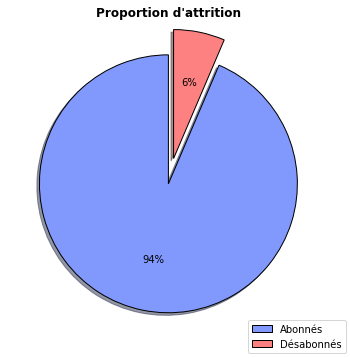

In [ ]:
proportion_churn(Dataset, 'is_churn')

In [ ]:
# Split
r =  40
Train, REM = train_test_split(Dataset, train_size=0.7, stratify = Dataset['is_churn'], random_state = r)
Valid, Test = train_test_split(REM, test_size=0.2, stratify = REM['is_churn'], random_state = r)
print(f'Dimensions Train : {Train.shape}')
print(f'Dimensions Valid : {Valid.shape}')
print(f'Dimensions Test  : {Test.shape}\n')

# V√©rification de la proportion churn:
ratio_churn(Train,'Train')
ratio_churn(Valid,'Valid')
ratio_churn(Test,'Test')

# D√©finition de features X et Target Y
X_train = Train.drop(['msno','is_churn'], axis = 1)
y_train = Train['is_churn'].astype(int)

X_valid = Valid.drop(['msno','is_churn'], axis = 1)
y_valid = Valid['is_churn'].astype(int)

print("\nDimension X_train dataset: ", X_train.shape)
print("Dimension y_train dataset: ",   y_train.shape)
print("Dimension X_valid dataset: ",   X_valid.shape)
print("Dimension y_valid dataset: ",   y_valid.shape)

# Standardisation des donn√©es
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

# scaler = joblib.dump(sc_X, '/content/gdrive/My Drive/microsoft_ia/Analyses Projet CO/ScalerXGBC_BF.joblib')

X_valid2 = pd.DataFrame(sc_X.transform(X_valid))
X_valid2.columns = X_valid.columns.values
X_valid2.index = X_valid.index.values
X_valid = X_valid2

Dimensions Train : (508005, 90)
Dimensions Valid : (174173, 90)
Dimensions Test  : (43544, 90)

Proportion d√©sabonn√©s sur Train :	6.42 %
Proportion d√©sabonn√©s sur Valid :	6.42 %
Proportion d√©sabonn√©s sur Test :	6.42 %

Dimension X_train dataset:  (508005, 88)
Dimension y_train dataset:  (508005,)
Dimension X_valid dataset:  (174173, 88)
Dimension y_valid dataset:  (174173,)


## Strat√©gie de Sous-Echantillonnage
Dans cette partie, un sous-√©chantillonnage sera effectu√© sur la classe Majoritaire. *NearMiss-3* sera utilis√© pour v√©rifier les performances des mod√®les apr√®s √©quilibrages des donn√©es d'apprentissage. D'autres techniques comme *Condensed Nearest Neighbor* ou *TomekLinks* pr√©sente une finalit√© similaire mais en s√©lectionnant diff√©remment les donn√©es de la classe majoritaire. Ces deux derni√®res techniques ne seront pas utilis√©s car ce sont des algorithmes tr√®s co√ªteux en temps.

https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/

### NearMiss-3

NearMiss-3 est une m√©thode de sous-√©chantillonnage qui s√©lectionnent des exemples en fonction de la distance entre les exemples de classe majoritaire et les exemples de classe minoritaire (Jianping Zhang et Inderjeet Mani. *KNN Approach to Unbalanced Data Distributions: A Case Study Involving Information Extraction.* 2003).

In [ ]:
from imblearn.under_sampling import NearMiss

# Transformation:
NearMiss_sample = NearMiss(version=3, n_neighbors_ver3=3)
X_NM3, y_NM3 = NearMiss_sample.fit_resample(X_train, y_train)

Taille du Dataset Train = 65244


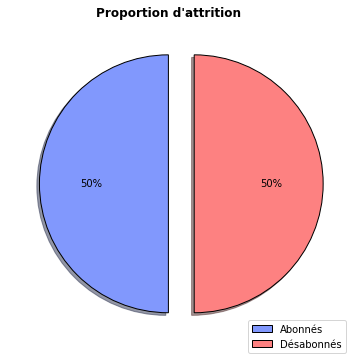

In [ ]:
print(f'Taille du Dataset Train = {y_NM3.shape[0]}')
proportion_churn(y_NM3.to_frame(), 'is_churn')

In [ ]:
%%time


models = []
models.append([LogisticRegression(), 'Logistic Regression'])
models.append([GaussianNB(), 'Naive Bayes Classifier'])
models.append([DecisionTreeClassifier(), 'Decision Tree Classifier'])
models.append([RandomForestClassifier(), 'Random Forest Classifier'])
models.append([BaggingClassifier(), 'Bagging Classifier'])
models.append([AdaBoostClassifier(), 'AdaBoost Classifier'])
models.append([LGBMClassifier(metrics = 'binary_logloss', objective='binary'), 'LightGBM Classifier'])
models.append([XGBClassifier(eval_metric = 'logloss', objective = 'binary:logistic', tree_method='hist'), 'XGBoost Classifier'])

# Evaluation des mod√®les:
names = []
auc_results_NM3 = []
loss_results_NM3 = []
f1_results_NM3 = []
precision_results_NM3 = []
recall_results_NM3 = []
MCC_results_NM3 = []

# Cr√©ation d'un tableau reportant les performances de chaque mod√®le:
col = ['Model', 'ROC AUC Mean', 'ROC AUC STD', 'Log loss Mean', 'Log loss STD', 
       'F1 Mean', 'F1 STD', 'Precision Mean', 'Precision STD', 'Recall Mean', 
       'Recall STD', 'MCC Mean', 'MCC STD']

model_results_NM3 = pd.DataFrame(columns=col)

# Metrics :
scoring = {"AUC": "roc_auc", 
           "Loss": 'neg_log_loss',
           "F1" : 'f1',
           "Precision":'precision',
           "Recall":'recall',
           "MCC": metrics.make_scorer(matthews_corrcoef)}
i = 0

# Evaluation des mod√®les utilisant le k-fold cross-validation:
for model, name in models:
    print(f'Entrainement en cours sur : {name}')
    
    # Score:
    
    cv_results = model_selection.cross_validate(model, X_NM3, y_NM3, cv = StratifiedKFold(5), scoring = scoring)
    
    auc_results_NM3.append(cv_results['test_AUC'])
    loss_results_NM3.append(cv_results['test_Loss'])
    f1_results_NM3.append(cv_results['test_F1'])
    precision_results_NM3.append(cv_results['test_Precision'])
    recall_results_NM3.append(cv_results['test_Recall'])
    MCC_results_NM3.append(cv_results['test_MCC'])
    
    names.append(name)
    model_results_NM3.loc[i] = [name,
                            round(cv_results['test_AUC'].mean()*100, 2),
                            round(cv_results['test_AUC'].std()*100, 2),
                            round(cv_results['test_Loss'].mean()*-1, 2),
                            round(cv_results['test_Loss'].std(), 2),
                            round(cv_results['test_F1'].mean()*100, 2),
                            round(cv_results['test_F1'].std()*100, 2),
                            round(cv_results['test_Precision'].mean()*100, 2),
                            round(cv_results['test_Precision'].std()*100, 2),
                            round(cv_results['test_Recall'].mean()*100, 2),
                            round(cv_results['test_Recall'].std()*100, 2),
                            round(cv_results['test_MCC'].mean()*100, 2),
                            round(cv_results['test_MCC'].std()*100, 2)]
    i += 1

model_results_NM3.to_csv('/content/gdrive/My Drive/microsoft_ia/Analyses Projet CO/Resultats/model_results_NM3.csv', index = False)

Entrainement en cours sur : Logistic Regression
Entrainement en cours sur : Naive Bayes Classifier
Entrainement en cours sur : Decision Tree Classifier
Entrainement en cours sur : Random Forest Classifier
Entrainement en cours sur : Bagging Classifier
Entrainement en cours sur : AdaBoost Classifier
Entrainement en cours sur : LightGBM Classifier
Entrainement en cours sur : XGBoost Classifier
CPU times: user 4min 8s, sys: 5.27 s, total: 4min 13s
Wall time: 3min 51s


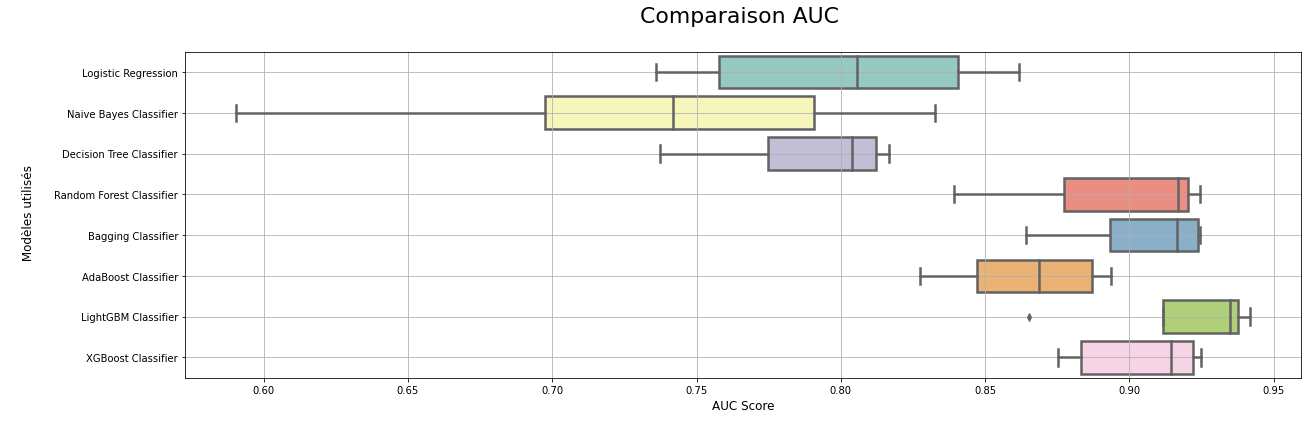

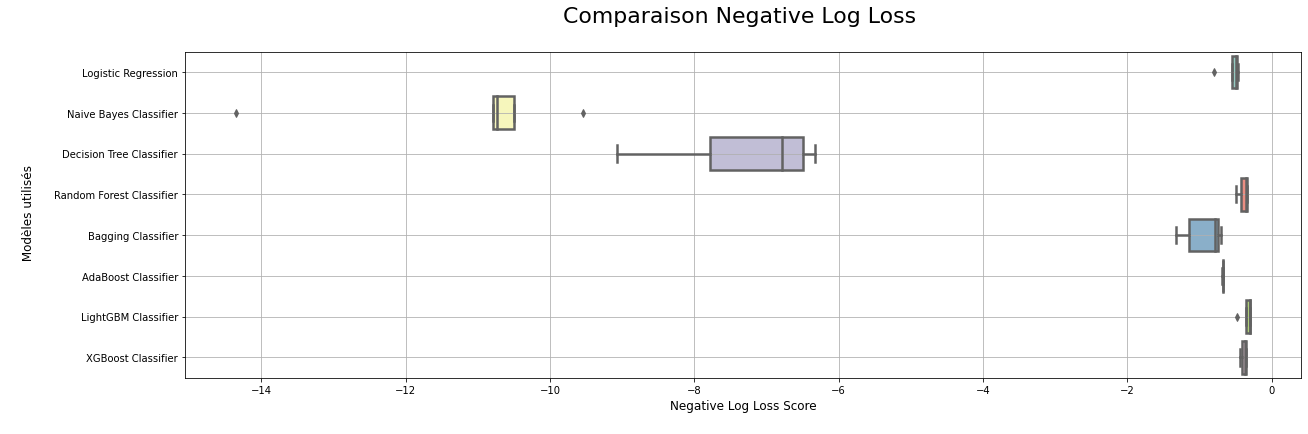

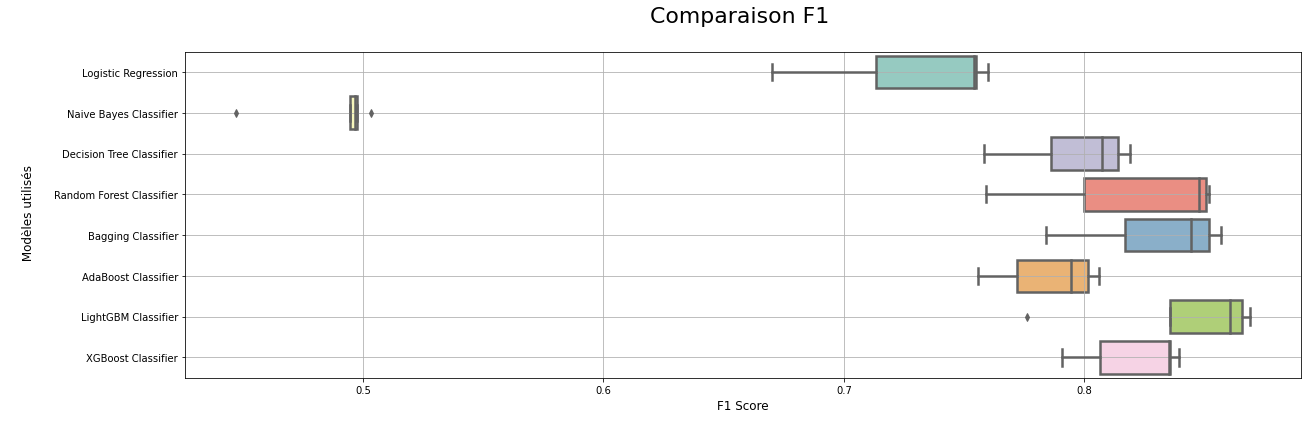

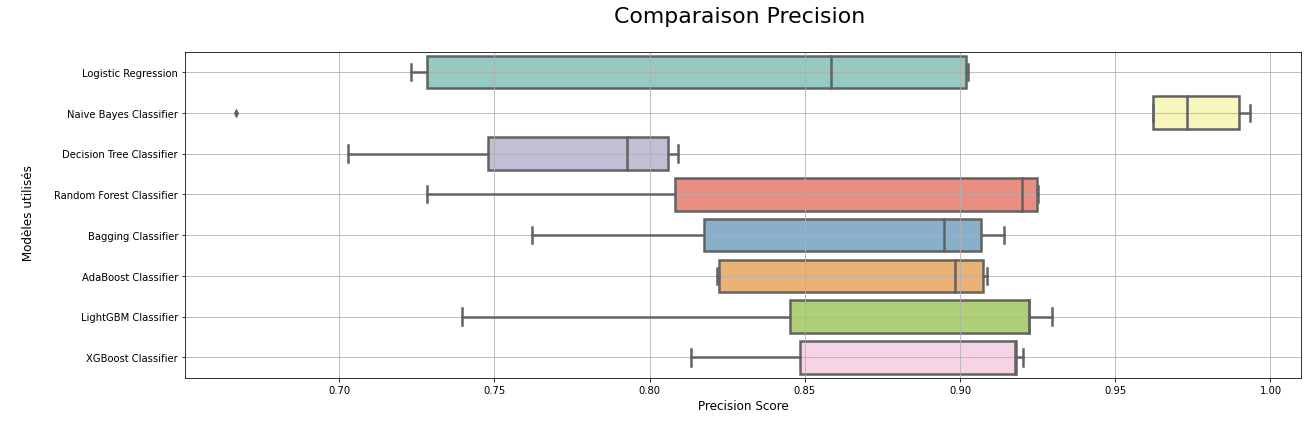

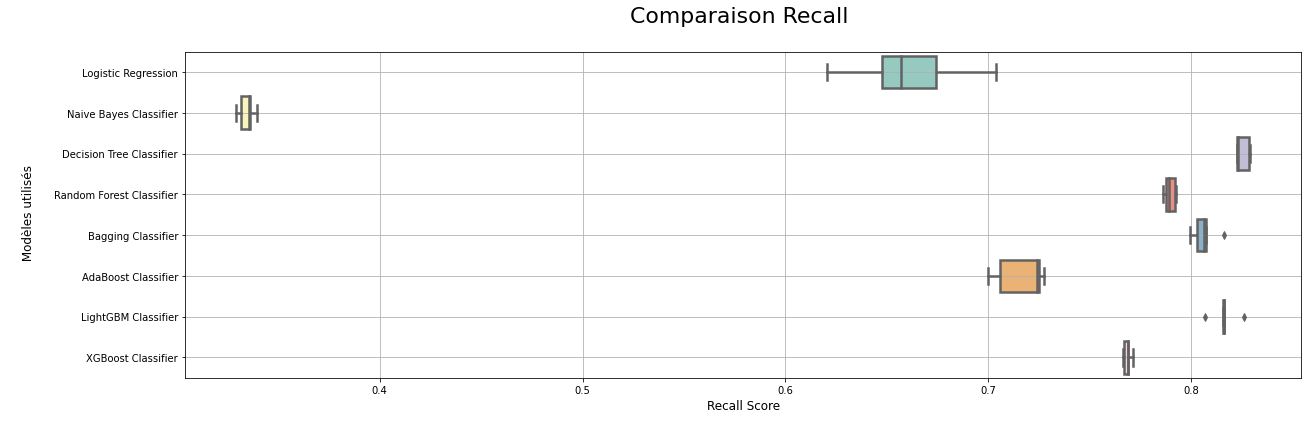

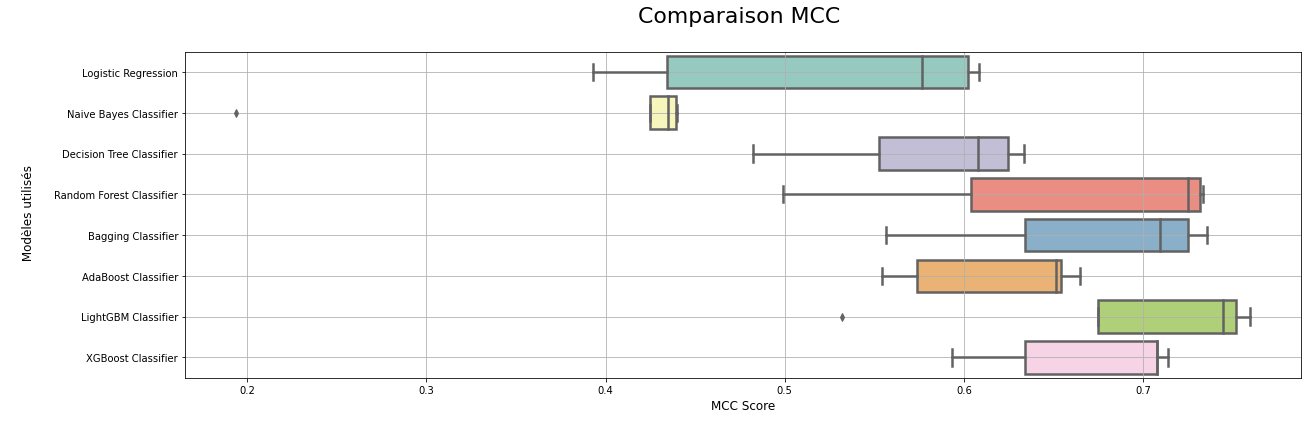

In [ ]:
# Comparaison des m√©triques avec la cross-validation:
compare_model(auc_results_NM3, 'AUC', names)
compare_model(loss_results_NM3, 'Negative Log Loss', names)
compare_model(f1_results_NM3, 'F1', names)
compare_model(precision_results_NM3, 'Precision', names)
compare_model(recall_results_NM3, 'Recall', names)
compare_model(MCC_results_NM3, 'MCC', names)

In [ ]:
# Bilan de performance:
summary_NM3 = model_results_NM3.drop(['ROC AUC STD', 'Log loss STD', 'F1 STD', 'Precision STD', 'Recall STD', 'MCC STD'],1)
summary_NM3.columns = ['Model', 'Roc_AUC', 'Log_loss', 'F1', 'Precision', 'Recall', 'MCC']
summary_NM3 = summary_NM3.sort_values(by = ['Log_loss','Roc_AUC','MCC'], ascending = [True, False, False])
summary_NM3

Model  Roc_AUC  Log_loss     F1  Precision  Recall  \
6       LightGBM Classifier    91.82      0.35  84.14      87.17   81.61   
7        XGBoost Classifier    90.39      0.38  82.15      88.36   76.86   
3  Random Forest Classifier    89.55      0.39  82.18      86.12   78.94   
0       Logistic Regression    80.04      0.56  73.05      82.28   66.05   
5       AdaBoost Classifier    86.48      0.68  78.60      87.17   71.64   
4        Bagging Classifier    90.44      0.94  83.08      85.91   80.64   
2  Decision Tree Classifier    78.89      7.29  79.69      77.17   82.51   
1    Naive Bayes Classifier    73.05     11.19  48.77      91.71   33.43   

     MCC  
6  69.26  
7  67.15  
3  65.85  
0  52.29  
5  61.97  
4  67.21  
2  58.01  
1  38.65

In [ ]:
# Enregistrement des r√©sultats:
model_results_NM3.to_csv('/content/gdrive/My Drive/microsoft_ia/Analyses Projet CO/Resultats/model_results_NM3.csv', index = False)

In [ ]:
%%time


models = []
models.append([LogisticRegression(), 'Logistic Regression_NM3'])
models.append([GaussianNB(), 'Naive Bayes Classifier_NM3'])
models.append([DecisionTreeClassifier(), 'Decision Tree Classifier_NM3'])
models.append([RandomForestClassifier(), 'Random Forest Classifier_NM3'])
models.append([BaggingClassifier(), 'Bagging Classifier_NM3'])
models.append([AdaBoostClassifier(), 'AdaBoost Classifier_NM3']) 
models.append([LGBMClassifier(metrics = 'binary_logloss', objective='binary'), 'LightGBM Classifier_NM3'])
models.append([XGBClassifier(eval_metric = 'logloss', objective = 'binary:logistic', tree_method='hist'), 'XGBoost Classifier_NM3'])

# Cr√©ation d'un tableau reportant les performances de chaque mod√®le
evaluation = ['Model', 'Roc_AUC', 'Log_loss', 'F1', 'Precision', 'Recall', 'MCC']
model_validation_NM3 = pd.DataFrame(columns=evaluation)

i = 0

# Evaluation des mod√®les utilisant le k-fold cross-validation:
for model, name in models:
    print(f'Entrainement en cours sur : {name}')
    
    # Entrainement et Evaluation:
    
    model = model.fit(X_NM3, y_NM3)
    y_pred = model.predict(X_valid)
    probability = model.predict_proba(X_valid)
    probability = probability[:,1]

    auc = metrics.roc_auc_score(y_valid, probability)
    logloss = metrics.log_loss(y_valid, probability)
    f1 = metrics.f1_score(y_valid, y_pred)
    precision = metrics.precision_score(y_valid, y_pred)
    recall = metrics.recall_score(y_valid, y_pred)
    MCC = metrics.matthews_corrcoef(y_valid, y_pred)

    model_validation_NM3.loc[i] = [name, auc, logloss, f1, precision, recall, MCC]
    i += 1

Entrainement en cours sur : Logistic Regression_NM3
Entrainement en cours sur : Naive Bayes Classifier_NM3
Entrainement en cours sur : Decision Tree Classifier_NM3
Entrainement en cours sur : Random Forest Classifier_NM3
Entrainement en cours sur : Bagging Classifier_NM3
Entrainement en cours sur : AdaBoost Classifier_NM3
Entrainement en cours sur : LightGBM Classifier_NM3
Entrainement en cours sur : XGBoost Classifier_NM3
CPU times: user 1min 25s, sys: 2.14 s, total: 1min 27s
Wall time: 1min 25s


In [ ]:
valid_summary_NM3 = model_validation_NM3.sort_values(by = ['Log_loss','Roc_AUC','MCC'], ascending = [True, False, False])
valid_summary_NM3

Model   Roc_AUC  Log_loss        F1  Precision  \
6       LightGBM Classifier_NM3  0.954258  0.224014  0.635363   0.518261   
7        XGBoost Classifier_NM3  0.915892  0.322836  0.552961   0.429526   
3  Random Forest Classifier_NM3  0.908615  0.379720  0.429682   0.293635   
0       Logistic Regression_NM3  0.781566  0.520175  0.227528   0.137243   
4        Bagging Classifier_NM3  0.950723  0.592924  0.629031   0.513399   
5       AdaBoost Classifier_NM3  0.863206  0.682769  0.497540   0.381694   
1    Naive Bayes Classifier_NM3  0.718916  1.406930  0.497135   0.943972   
2  Decision Tree Classifier_NM3  0.858497  4.044247  0.476701   0.334293   

     Recall       MCC  
6  0.820831  0.623238  
7  0.775950  0.539847  
3  0.800626  0.431170  
0  0.664998  0.200212  
4  0.811891  0.616041  
5  0.714350  0.478659  
1  0.337416  0.550072  
2  0.830487  0.480000

In [ ]:
valid_summary_NM3.to_csv('/content/gdrive/My Drive/microsoft_ia/Analyses Projet CO/Resultats/valid_summary_NM3.csv', index = False)

## Strat√©gie de Sur-Echantillonnnage
Pour lutter contre le d√©s√©quilibre de classe, plusieurs m√©thodes de sur-√©chantillonnage de la classe minoritaire sont envisageables. La premi√®re est de tout simplement d√©cupler les donn√©es pour atteindre un ratio √©quilibr√©. Une autre option est de cr√©er des donn√©es de la classe minoritaire par des algorithmes tels que SMOTE (et ses alternatifs) ou encore ADASYN.

https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

In [ ]:
# Transformation:
Smote_sample = SMOTE()
X_smote, y_smote = Smote_sample.fit_resample(X_train, y_train)

Taille du Dataset Train = 950766


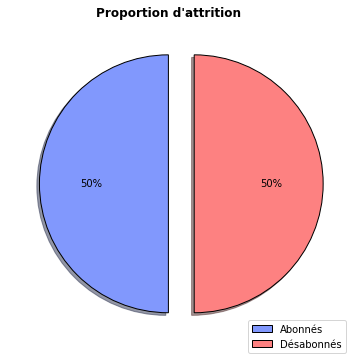

In [ ]:
print(f'Taille du Dataset Train = {y_smote.shape[0]}')
proportion_churn(y_smote.to_frame(), 'is_churn')

In [ ]:
%%time


models = []
models.append([LogisticRegression(), 'Logistic Regression'])
models.append([GaussianNB(), 'Naive Bayes Classifier'])
models.append([DecisionTreeClassifier(), 'Decision Tree Classifier'])
models.append([RandomForestClassifier(), 'Random Forest Classifier'])
models.append([BaggingClassifier(), 'Bagging Classifier'])
models.append([AdaBoostClassifier(), 'AdaBoost Classifier'])
models.append([LGBMClassifier(metrics = 'binary_logloss', objective='binary'), 'LightGBM Classifier'])
models.append([XGBClassifier(eval_metric = 'logloss', objective = 'binary:logistic', tree_method='hist'), 'XGBoost Classifier'])

# Evaluation des mod√®les:
names = []
auc_results_smote = []
loss_results_smote = []
f1_results_smote = []
precision_results_smote = []
recall_results_smote = []
MCC_results_smote = []

# Cr√©ation d'un tableau reportant les performances de chaque mod√®le:
col = ['Model', 'ROC AUC Mean', 'ROC AUC STD', 'Log loss Mean', 'Log loss STD', 
       'F1 Mean', 'F1 STD', 'Precision Mean', 'Precision STD', 'Recall Mean', 
       'Recall STD', 'MCC Mean', 'MCC STD']

model_results_smote = pd.DataFrame(columns=col)

# Metrics :
scoring = {"AUC": "roc_auc", 
           "Loss": 'neg_log_loss',
           "F1" : 'f1',
           "Precision":'precision',
           "Recall":'recall',
           "MCC": metrics.make_scorer(matthews_corrcoef)}
i = 0

# Evaluation des mod√®les utilisant le k-fold cross-validation:
for model, name in models:
    print(f'Entrainement en cours sur : {name}')
    
    # Score:
    
    cv_results = model_selection.cross_validate(model, X_smote, y_smote, cv = StratifiedKFold(5), scoring = scoring)
    
    auc_results_smote.append(cv_results['test_AUC'])
    loss_results_smote.append(cv_results['test_Loss'])
    f1_results_smote.append(cv_results['test_F1'])
    precision_results_smote.append(cv_results['test_Precision'])
    recall_results_smote.append(cv_results['test_Recall'])
    MCC_results_smote.append(cv_results['test_MCC'])
    
    names.append(name)
    model_results_smote.loc[i] = [name,
                            round(cv_results['test_AUC'].mean()*100, 2),
                            round(cv_results['test_AUC'].std()*100, 2),
                            round(cv_results['test_Loss'].mean()*-1, 2),
                            round(cv_results['test_Loss'].std(), 2),
                            round(cv_results['test_F1'].mean()*100, 2),
                            round(cv_results['test_F1'].std()*100, 2),
                            round(cv_results['test_Precision'].mean()*100, 2),
                            round(cv_results['test_Precision'].std()*100, 2),
                            round(cv_results['test_Recall'].mean()*100, 2),
                            round(cv_results['test_Recall'].std()*100, 2),
                            round(cv_results['test_MCC'].mean()*100, 2),
                            round(cv_results['test_MCC'].std()*100, 2)]
    i += 1

Entrainement en cours sur : Logistic Regression
Entrainement en cours sur : Naive Bayes Classifier
Entrainement en cours sur : Decision Tree Classifier
Entrainement en cours sur : Random Forest Classifier
Entrainement en cours sur : Bagging Classifier
Entrainement en cours sur : AdaBoost Classifier
Entrainement en cours sur : LightGBM Classifier
Entrainement en cours sur : XGBoost Classifier
CPU times: user 1h 36min 17s, sys: 1min 4s, total: 1h 37min 22s
Wall time: 1h 35min 5s


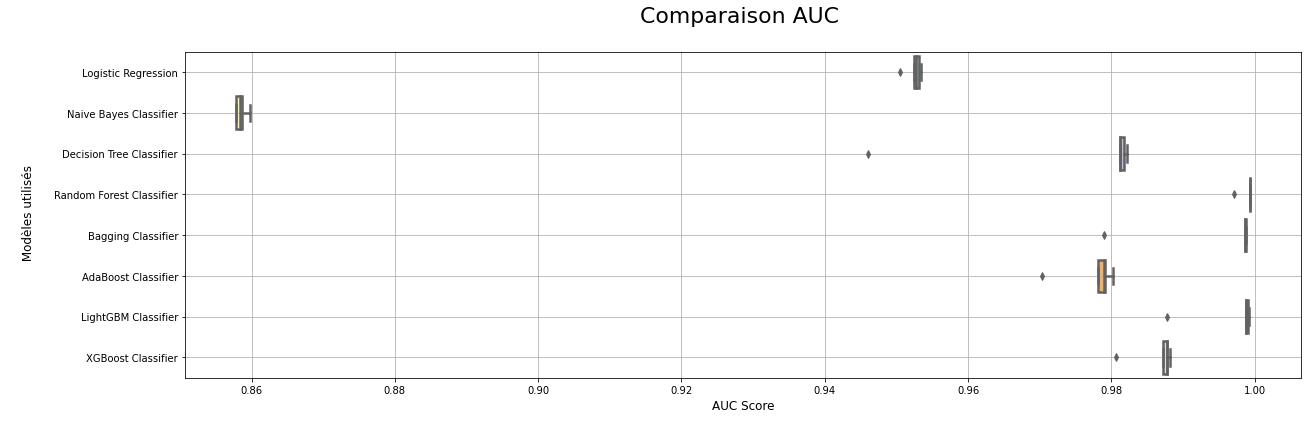

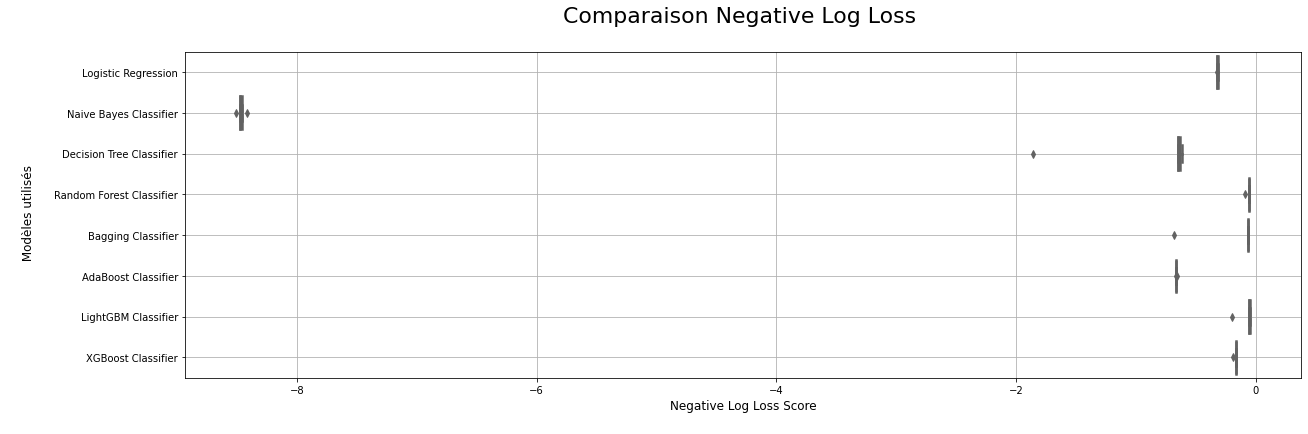

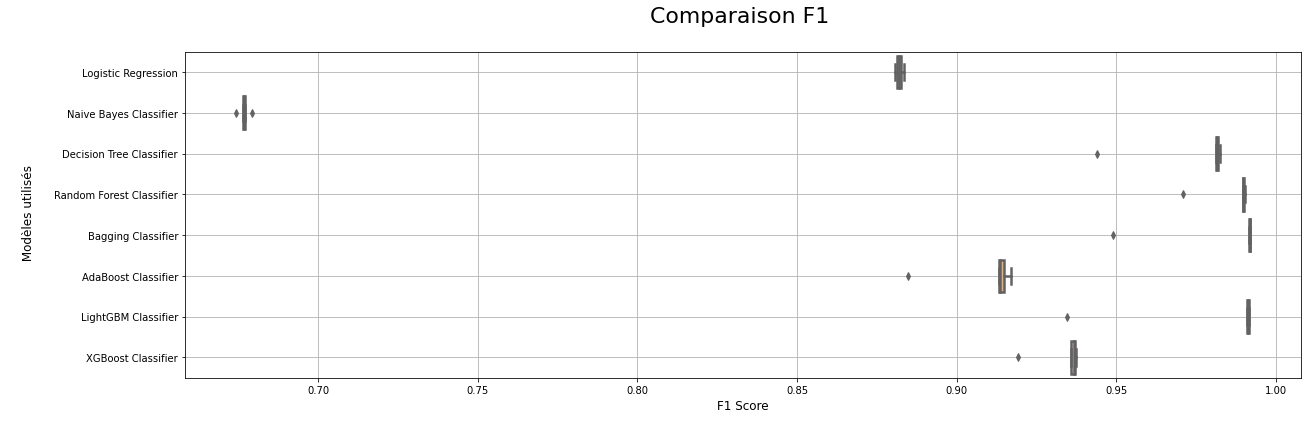

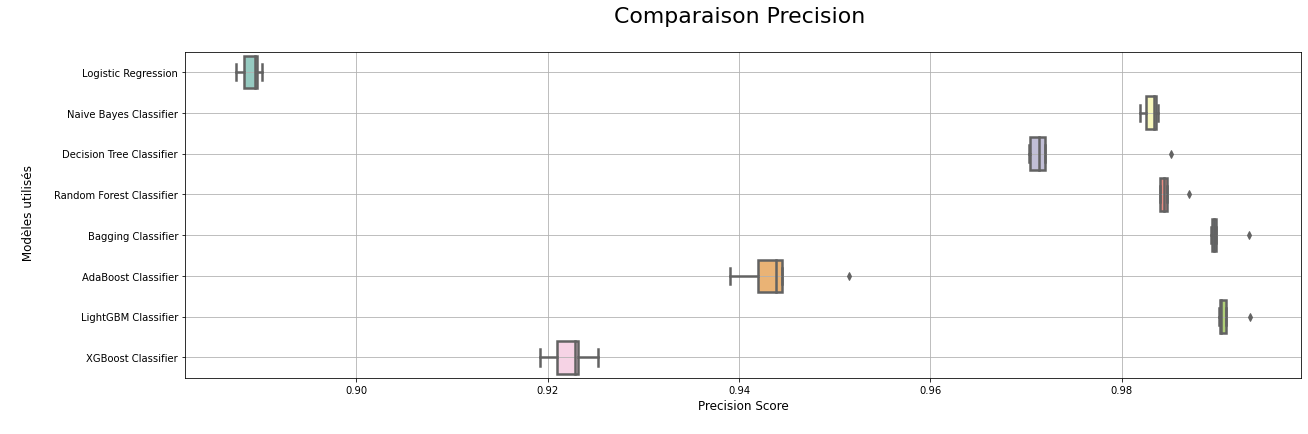

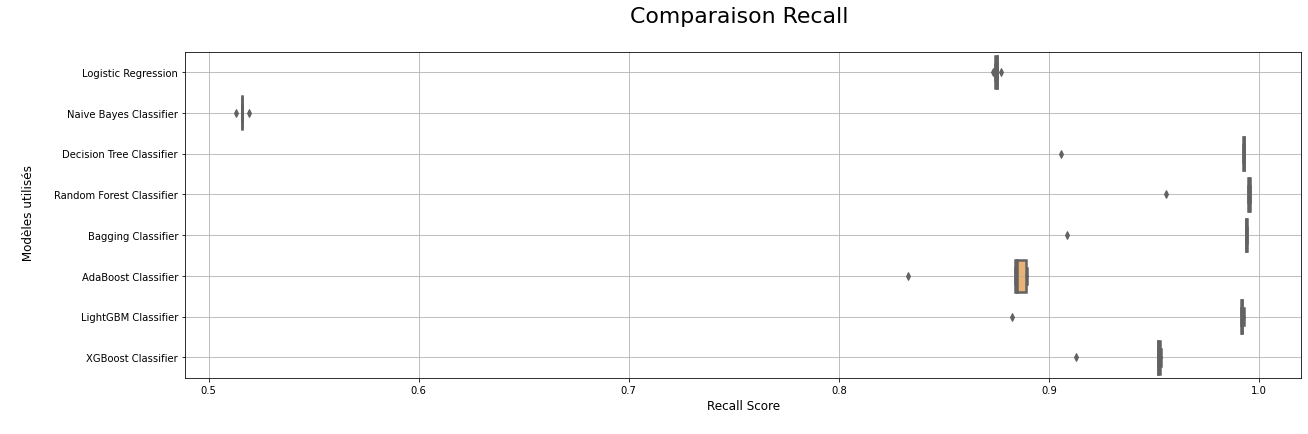

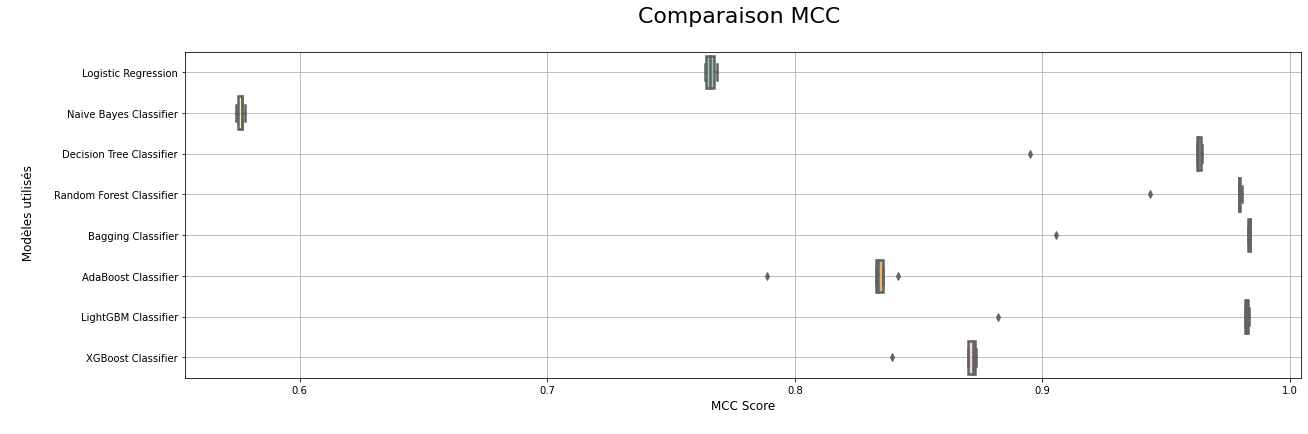

In [ ]:
# Comparaison des m√©triques avec la cross-validation:
compare_model(auc_results_smote, 'AUC', names)
compare_model(loss_results_smote, 'Negative Log Loss', names)
compare_model(f1_results_smote, 'F1', names)
compare_model(precision_results_smote, 'Precision', names)
compare_model(recall_results_smote, 'Recall', names)
compare_model(MCC_results_smote, 'MCC', names)

In [ ]:
# Bilan de performance:
summary_smote = model_results_smote.drop(['ROC AUC STD', 'Log loss STD', 'F1 STD', 'Precision STD', 'Recall STD', 'MCC STD'],1)
summary_smote.columns = ['Model', 'Roc_AUC', 'Log_loss', 'F1', 'Precision', 'Recall', 'MCC']
summary_smote = summary_smote.sort_values(by = ['Log_loss','Roc_AUC','MCC'], ascending = [True, False, False])
summary_smote

Model  Roc_AUC  Log_loss     F1  Precision  Recall  \
3  Random Forest Classifier    99.89      0.07  98.61      98.48   98.76   
6       LightGBM Classifier    99.67      0.08  98.00      99.10   97.02   
7        XGBoost Classifier    98.63      0.17  93.32      92.23   94.46   
4        Bagging Classifier    99.48      0.19  98.33      99.03   97.70   
0       Logistic Regression    95.24      0.32  88.20      88.90   87.51   
5       AdaBoost Classifier    97.74      0.66  90.87      94.42   87.60   
2  Decision Tree Classifier    97.45      0.88  97.42      97.39   97.54   
1    Naive Bayes Classifier    85.85      8.47  67.67      98.31   51.59   

     MCC  
3  97.25  
6  96.25  
7  86.53  
4  96.80  
0  76.59  
5  82.65  
2  94.97  
1  57.62

In [ ]:
model_results_smote.to_csv('/content/gdrive/My Drive/microsoft_ia/Analyses Projet CO/Resultats/model_results_smote.csv', index = False)

In [ ]:
models = []
models.append([LogisticRegression(), 'Logistic Regression_smote'])
models.append([GaussianNB(), 'Naive Bayes Classifier_smote'])
models.append([DecisionTreeClassifier(), 'Decision Tree Classifier_smote'])
models.append([RandomForestClassifier(), 'Random Forest Classifier_smote'])
models.append([BaggingClassifier(), 'Bagging Classifier_smote'])
models.append([AdaBoostClassifier(), 'AdaBoost Classifier_smote']) 
models.append([LGBMClassifier(metrics = 'binary_logloss', objective='binary'), 'LightGBM Classifier_smote'])
models.append([XGBClassifier(eval_metric = 'logloss', objective = 'binary:logistic', tree_method='hist'), 'XGBoost Classifier_smote'])

# Cr√©ation d'un tableau reportant les performances de chaque mod√®le
evaluation = ['Model', 'Roc_AUC', 'Log_loss', 'F1', 'Precision', 'Recall', 'MCC']
model_validation_smote = pd.DataFrame(columns=evaluation)

i = 0

# Evaluation des mod√®les utilisant le k-fold cross-validation:
for model, name in models:
    print(f'Entrainement en cours sur : {name}')
    
    # Entrainement et Evaluation:
    
    model = model.fit(X_smote, y_smote)
    y_pred = model.predict(X_valid)
    probability = model.predict_proba(X_valid)
    probability = probability[:,1]

    auc = metrics.roc_auc_score(y_valid, probability)
    logloss = metrics.log_loss(y_valid, probability)
    f1 = metrics.f1_score(y_valid, y_pred)
    precision = metrics.precision_score(y_valid, y_pred)
    recall = metrics.recall_score(y_valid, y_pred)
    MCC = metrics.matthews_corrcoef(y_valid, y_pred)

    model_validation_smote.loc[i] = [name, auc, logloss, f1, precision, recall, MCC]
    i += 1

Entrainement en cours sur : Logistic Regression_smote
Entrainement en cours sur : Naive Bayes Classifier_smote
Entrainement en cours sur : Decision Tree Classifier_smote
Entrainement en cours sur : Random Forest Classifier_smote
Entrainement en cours sur : Bagging Classifier_smote
Entrainement en cours sur : AdaBoost Classifier_smote
Entrainement en cours sur : LightGBM Classifier_smote
Entrainement en cours sur : XGBoost Classifier_smote


In [ ]:
valid_summary_smote = model_validation_smote.sort_values(by = ['Log_loss','Roc_AUC','MCC'], ascending = [True, False, False])
valid_summary_smote

Model   Roc_AUC  Log_loss        F1  Precision  \
6       LightGBM Classifier_smote  0.974135  0.088697  0.789580   0.853757   
3  Random Forest Classifier_smote  0.973334  0.100887  0.768132   0.797957   
7        XGBoost Classifier_smote  0.966501  0.174655  0.570266   0.426958   
4        Bagging Classifier_smote  0.944158  0.281024  0.792797   0.851092   
0       Logistic Regression_smote  0.945568  0.336311  0.502520   0.352720   
5       AdaBoost Classifier_smote  0.950848  0.666607  0.586158   0.473739   
1    Naive Bayes Classifier_smote  0.859118  1.326218  0.633862   0.799292   
2  Decision Tree Classifier_smote  0.859064  1.386147  0.704064   0.668677   

     Recall       MCC  
6  0.734376  0.778785  
3  0.740456  0.753452  
7  0.858382  0.569736  
4  0.741976  0.781691  
0  0.873491  0.511784  
5  0.768529  0.569691  
1  0.525168  0.629363  
2  0.743406  0.683705

In [ ]:
valid_summary_smote.to_csv('/content/gdrive/My Drive/microsoft_ia/Analyses Projet CO/Resultats/valid_summary_smote.csv', index = False)

## Strat√©gie Combin√©e Undersampling et Oversampling

Quelques exemples d'√©chantillonnages avec des ratios diff√©rents en utilisant un mod√®le unique. Le mieux serait d'effectuer cette strat√©gie pour tous les mod√®les utilis√©s (R√©seau de neurones, Mod√®les Stacking, d'ensembles etc...). Cependant la t√¢che reste fastidieuse et longue.

https://towardsdatascience.com/how-to-deal-with-imbalanced-data-in-python-f9b71aba53eb

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Evaluation des mod√®les:
ratio = []
auc_results = []
loss_results = []
f1_results = []
precision_results = []
recall_results = []
MCC_results = []

# Metrics :
scoring = {"AUC": "roc_auc", 
           "Loss": 'neg_log_loss',
           "F1" : 'f1',
           "Precision":'precision',
           "Recall":'recall',
           "MCC": metrics.make_scorer(matthews_corrcoef)}

# Cr√©ation d'un tableau reportant les performances de chaque mod√®le:
col = ['Model', 'ROC AUC Mean', 'ROC AUC STD', 'Log loss Mean', 'Log loss STD', 
       'F1 Mean', 'F1 STD', 'Precision Mean', 'Precision STD', 'Recall Mean', 
       'Recall STD', 'MCC Mean', 'MCC STD']

model_ratio_strategy = pd.DataFrame(columns=col)

OverStrategy =  [0.3,0.4,0.5]
UnderStrategy = [0.7,0.6,0.5]

i = 0

for o in OverStrategy:
    for u in UnderStrategy:
  
        model = LGBMClassifier(metrics = 'binary_logloss', objective='binary')
        over = SMOTE(sampling_strategy = o)
        under = RandomUnderSampler(sampling_strategy = u)
        steps = [('over', over), ('under', under), ('model', model)]
        pipeline = Pipeline(steps=steps)

        cv_results = model_selection.cross_validate(pipeline, X_train, y_train, scoring = scoring, cv = StratifiedKFold(5))

        auc_results.append(cv_results['test_AUC'])
        loss_results.append(cv_results['test_Loss'])
        f1_results.append(cv_results['test_F1'])
        precision_results.append(cv_results['test_Precision'])
        recall_results.append(cv_results['test_Recall'])
        MCC_results.append(cv_results['test_MCC'])

        ratio.append([o,u])
        model_ratio_strategy.loc[i] = [[o,u],
                                round(cv_results['test_AUC'].mean()*100, 2),
                                round(cv_results['test_AUC'].std()*100, 2),
                                round(cv_results['test_Loss'].mean()*-1, 2),
                                round(cv_results['test_Loss'].std(), 2),
                                round(cv_results['test_F1'].mean()*100, 2),
                                round(cv_results['test_F1'].std()*100, 2),
                                round(cv_results['test_Precision'].mean()*100, 2),
                                round(cv_results['test_Precision'].std()*100, 2),
                                round(cv_results['test_Recall'].mean()*100, 2),
                                round(cv_results['test_Recall'].std()*100, 2),
                                round(cv_results['test_MCC'].mean()*100, 2),
                                round(cv_results['test_MCC'].std()*100, 2)]

        print(f"Over : {o} Under : {u}\t MCC : {cv_results['test_MCC'].mean()}\t Loss : {cv_results['test_Loss'].mean()*-1}")
        i += 1

Over : 0.3 Under : 0.7	 MCC : 0.7716135130972492	 Loss : 0.09144136417549933
Over : 0.3 Under : 0.6	 MCC : 0.7811282747366386	 Loss : 0.0859181253826907
Over : 0.3 Under : 0.5	 MCC : 0.7866776923072185	 Loss : 0.0812373946585295
Over : 0.4 Under : 0.7	 MCC : 0.7786272769005165	 Loss : 0.08551436855990276
Over : 0.4 Under : 0.6	 MCC : 0.7843008510489557	 Loss : 0.08133373715173944
Over : 0.4 Under : 0.5	 MCC : 0.7867265979041622	 Loss : 0.07787631981379999
Over : 0.5 Under : 0.7	 MCC : 0.780489971984893	 Loss : 0.08213662360743794
Over : 0.5 Under : 0.6	 MCC : 0.7842613705101497	 Loss : 0.07888295907839417
Over : 0.5 Under : 0.5	 MCC : 0.784216908028309	 Loss : 0.07669685063480552



LogLoss : 0.07591241612499873	 AUC : 0.9779411815042502	 F1 : 0.7985420155649691
Recall : 0.7247206079570854	 Precision : 0.889108259295821	 MCC : 0.7908454921640232



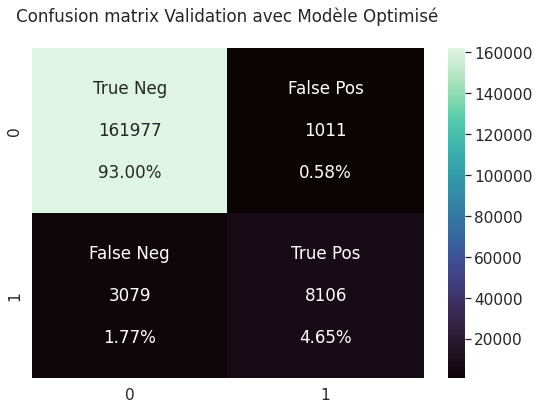

In [ ]:
model = LGBMClassifier(metrics = 'binary_logloss', objective='binary')

over = SMOTE(sampling_strategy = 0.5)
X_over, y_over = over.fit_resample(X_train, y_train)
under = RandomUnderSampler(sampling_strategy = 0.5)
X_combined, y_combined = under.fit_resample(X_over, y_over)

model = model.fit(X_combined, y_combined)
y_pred = model.predict(X_valid)
probability = model.predict_proba(X_valid)
probability = probability[:,1]

auc = metrics.roc_auc_score(y_valid, probability)
logloss = metrics.log_loss(y_valid, probability)
f1 = metrics.f1_score(y_valid, y_pred)
precision = metrics.precision_score(y_valid, y_pred)
recall = metrics.recall_score(y_valid, y_pred)
MCC = metrics.matthews_corrcoef(y_valid, y_pred)
print(f'\nLogLoss : {logloss}\t AUC : {auc}\t F1 : {f1}\nRecall : {recall}\t Precision : {precision}\t MCC : {MCC}\n')

plt.figure(figsize=(8,6))
df_cm = confusion_matrix(y_valid, y_pred) 
group_names = ["True Neg\n", "False Pos\n", "False Neg\n", "True Pos\n"]
group_counts = ["{0:0.0f}\n".format(value) for value in df_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in df_cm.flatten()/np.sum(df_cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=labels, fmt="", cmap='mako').set_title('Confusion matrix Validation avec Mod√®le Optimis√©\n')
class_names=[0,1]
tick_marks = np.arange(len(class_names))

plt.tight_layout()
plt.show()

## Utilisation de mod√®les Ensemble de samplers
*Imblearn* propose divers mod√®les sp√©cialis√©s contrant ces ph√©nom√®nes de d√©s√©quilibre de classes. Deux mod√®les avec des param√©trages √† d√©faut (Ensemble et Boosting) sont propos√©s :

https://imbalanced-learn.org/stable/ensemble.html

BalancedRandomForestClassifier:
LogLoss : 0.2185141678965018	 AUC : 0.9739457020890347	 F1 : 0.541600644206042
Recall : 0.9320518551631649	 Precision : 0.38170035149384884	 MCC : 0.558506780601123

RUSBoostClassifier:
LogLoss : 0.687030437135581	 AUC : 0.9600577885349172	 F1 : 0.5402854446128765
Recall : 0.8444345105051408	 Precision : 0.39721591386996385	 MCC : 0.5401293913905348



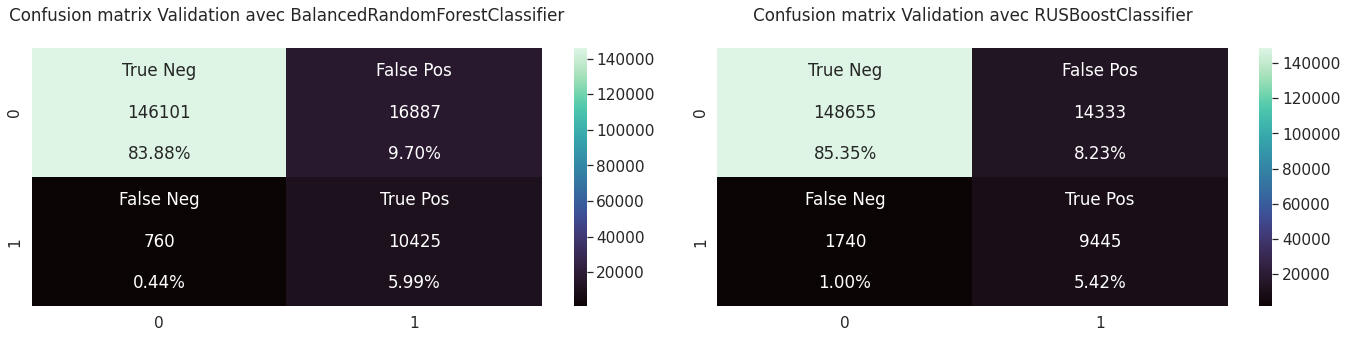

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier

BRFC = BalancedRandomForestClassifier(n_estimators=100, random_state=0)
BRFC.fit(X_train, y_train)

y_pred1 = BRFC.predict(X_valid)
probability1 = BRFC.predict_proba(X_valid)
probability1 = probability1[:,1]

auc = metrics.roc_auc_score(y_valid, probability1)
logloss = metrics.log_loss(y_valid, probability1)
f1 = metrics.f1_score(y_valid, y_pred1)
precision = metrics.precision_score(y_valid, y_pred1)
recall = metrics.recall_score(y_valid, y_pred1)
MCC = metrics.matthews_corrcoef(y_valid, y_pred1)
print(f'BalancedRandomForestClassifier:\nLogLoss : {logloss}\t AUC : {auc}\t F1 : {f1}\nRecall : {recall}\t Precision : {precision}\t MCC : {MCC}\n')

RUSBC = RUSBoostClassifier(n_estimators=200, algorithm='SAMME.R', random_state=0)
RUSBC.fit(X_train, y_train)

y_pred2 = RUSBC.predict(X_valid)
probability2 = RUSBC.predict_proba(X_valid)
probability2 = probability2[:,1]

auc = metrics.roc_auc_score(y_valid, probability2)
logloss = metrics.log_loss(y_valid, probability2)
f1 = metrics.f1_score(y_valid, y_pred2)
precision = metrics.precision_score(y_valid, y_pred2)
recall = metrics.recall_score(y_valid, y_pred2)
MCC = metrics.matthews_corrcoef(y_valid, y_pred2)
print(f'RUSBoostClassifier:\nLogLoss : {logloss}\t AUC : {auc}\t F1 : {f1}\nRecall : {recall}\t Precision : {precision}\t MCC : {MCC}\n')

fig, ax = plt.subplots(1, 2, figsize = (20, 5))
df_cm = confusion_matrix(y_valid, y_pred1) 
group_names = ["True Neg\n", "False Pos\n", "False Neg\n", "True Pos\n"]
group_counts = ["{0:0.0f}\n".format(value) for value in df_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in df_cm.flatten()/np.sum(df_cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.set(font_scale=1.4)
sn.heatmap(df_cm,  ax = ax[0], annot=labels, fmt="", cmap='mako').set_title('Confusion matrix Validation avec BalancedRandomForestClassifier\n')
class_names=[0,1]
tick_marks = np.arange(len(class_names))

df_cm = confusion_matrix(y_valid, y_pred2) 
group_names = ["True Neg\n", "False Pos\n", "False Neg\n", "True Pos\n"]
group_counts = ["{0:0.0f}\n".format(value) for value in df_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in df_cm.flatten()/np.sum(df_cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.set(font_scale=1.4)
sn.heatmap(df_cm, ax = ax[1], annot=labels, fmt="", cmap='mako').set_title('Confusion matrix Validation avec RUSBoostClassifier\n')
class_names=[0,1]
tick_marks = np.arange(len(class_names))

plt.tight_layout()
plt.show()

## Hyperparam√©trages de XGBoost sur le d√©s√©quilibre de classe
Dans cette derni√®re section, une calibration du param√®tre *Scale_pos_weight* de XGBoost peut √™tre utilis√© par exemple afin d'ajouter, comme son nom l'indique, plus de poids sur les donn√©es de la classe minoritaire. Ce param√®tre est surtout utile si la strat√©gie de l'entreprise souhaitant une IA de d√©tection de l'attrition souhaite minimiser le taux de Faux N√©gative. Toutefois, la m√©trique *Log_loss* montrera une baisse de performance de ce c√¥t√© l√†.

In [ ]:
col = ['Scale', 'Roc_AUC', 'Log_loss', 'F1', 'Precision', 'Recall', 'MCC']
Performance_scale = pd.DataFrame(columns = col)
Weight = [1, 3, 5, 7, 9, 11, 13, 15, 17]

i = 0
for w in Weight:
  model = XGBClassifier(eval_metric = 'logloss', objective = 'binary:logistic', tree_method = 'hist', scale_pos_weight = w)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_valid)
  probability = model.predict_proba(X_valid)
  probability = probability[:,1]

  auc = metrics.roc_auc_score(y_valid, probability)
  logloss = metrics.log_loss(y_valid, probability)
  f1 = metrics.f1_score(y_valid, y_pred)
  precision = metrics.precision_score(y_valid, y_pred)
  recall = metrics.recall_score(y_valid, y_pred)
  MCC = metrics.matthews_corrcoef(y_valid, y_pred)

  Performance_scale.loc[i] = [w, auc, logloss, f1, precision, recall, MCC]

  i+=1

In [ ]:
Performance_scale

Scale   Roc_AUC  Log_loss        F1  Precision    Recall       MCC
0    1.0  0.969104  0.084254  0.752752   0.928984  0.632722  0.754441
1    3.0  0.970510  0.101788  0.759600   0.826119  0.702995  0.747255
2    5.0  0.971713  0.124149  0.720273   0.688427  0.755208  0.700987
3    7.0  0.972703  0.145642  0.674286   0.576340  0.812338  0.659048
4    9.0  0.970360  0.171116  0.598445   0.459756  0.856951  0.594976
5   11.0  0.972713  0.186286  0.573302   0.419987  0.902906  0.580825
6   13.0  0.972485  0.203851  0.515576   0.357752  0.922575  0.533452
7   15.0  0.971418  0.224061  0.508516   0.348395  0.940992  0.531036
8   17.0  0.971723  0.238290  0.507139   0.347018  0.941618  0.529944

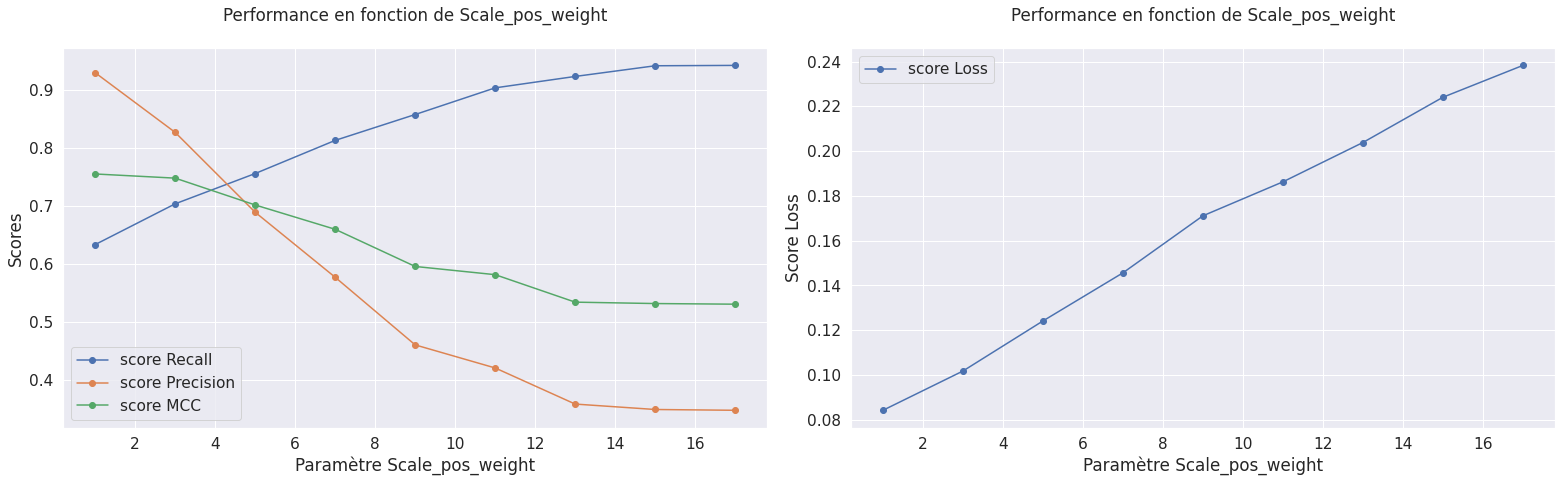

In [ ]:
W = Performance_scale['Scale']

fig, ax = plt.subplots(1,2, figsize = (22, 7))
plt.subplot(121)
plt.plot(W, Performance_scale['Recall'], '-o', label = 'score Recall')
plt.plot(W, Performance_scale['Precision'], '-o', label = 'score Precision')
plt.plot(W, Performance_scale['MCC'], '-o', label = 'score MCC')
plt.title('Performance en fonction de Scale_pos_weight\n')
plt.ylabel('Scores')
plt.xlabel('Param√®tre Scale_pos_weight')
plt.legend()

plt.subplot(122)
plt.plot(W, Performance_scale['Log_loss'], '-o', label = 'score Loss')
plt.title('Performance en fonction de Scale_pos_weight\n')
plt.ylabel('Score Loss')
plt.xlabel('Param√®tre Scale_pos_weight')
plt.legend()

plt.tight_layout()
plt.savefig('/content/gdrive/My Drive/microsoft_ia/Analyses Projet CO/Resultats/Score_BestFeatures_Nb.png')
plt.show()

## D√©finition du seuil de d√©cision MCC-F1 Curve
Bas√© sur l'article *The MCC-F1 curve: a performance evaluation technique for binary classification (Cao, Chicco, & Hoffman, 2020)* https://arxiv.org/abs/2006.11278

### Fonctions
https://github.com/krishnanlab/MCC-F1-Curve-and-Metrics/blob/master/MCC-F1_code.ipynb

In [35]:
def mcc_f1(ground_truths, predicted_values):
    
    """
    The function mcc_f1 calculates MCC and F1 scores based on varying thresholds identifed by the PRC function
    based on inputs -  ground truth vaules and predicted values.
    
    Parameters
    ----------
    ground_truths, predicted_values : numpy.ndarray;
                        Input arrays; groundtruth values (True values) and predicted values.
    
    Returns
    -------
    mcc, f1, thresholds: numpy.ndarray;
                           Output arrays; Unit normalized MCC scores and F1 score values 
                           for every threshold.           
    """
    
    mcc = []   
    f1 = []
    
    # Generating thresholds with the PRC function
    precision, recall, thresholds = sklearn.metrics.precision_recall_curve(
                                    ground_truths, predicted_values)

    # For every value of the thresholds (cutoffs), calculate MCC and F1 scores :
    for T in thresholds:
        predicted_values_after_cutoff = predicted_values > T  # Positive classes are determined for every predicted value that exceeds the threshold. 
    
        mcc.append((sklearn.metrics.matthews_corrcoef(
                    ground_truths, predicted_values_after_cutoff)+1)*0.5) # get normalised MCC: change the range of MCC from [-1, 1] to [0, 1] 
        
        f1.append(sklearn.metrics.f1_score(
                    ground_truths, predicted_values_after_cutoff))
        
    mcc = np.array(mcc)
    f1 = np.array(f1)  
    
    # Resulting values are an array of MCC & F1 scores across different thresholds (cutoffs)  
    return mcc,f1, thresholds

# MCC-F1 Metric:
def MCC_F1_Metric(mcc,f1,thresholds, W_num_of_subranges = 100):
    
    """
    MCC_F1_Metric function computes the MCC-F1 metric i.e. the average distances between the predcition scores to the point of Perfect Performace (1,1) 
    and also results in the best threshold value
    
    Parameters
    ----------
    
    mcc,f1, thresholds : numpy.ndarray;
                        MCC and F1 scores across varying thresholds
    
    W_num_of_subranges : int, optional;
        Number of subranges- default = 100; 
        larger values of ùëä will cause the MCC-ùêπ1 metric to capture the performance of a classifier more accurately.
    
    Returns
    -------
    
    MCC_F1_Met : float;
                The ratio of the average distance of the MCC-F1 score to the Point of Perfect Performace (1,1)
                A metric to compare classifier performance.
    
    Best_threshold : int;
                Index of the best prediction score threshold (ùëá), 
                Index of the point on the MCC-ùêπ1 curve closest to the point of perfect performance (1,1).
    
    """
    
     
    subrange_intervals = np.linspace(np.min(mcc), np.max(mcc),W_num_of_subranges) # breaking into subranges
    
    # Computing MCC values per subrange
    
    values_per_subrange = np.zeros_like(subrange_intervals) # 'n' is the number of points per subrange
    for i in range(W_num_of_subranges-1):
        for j in mcc:
            if j >= subrange_intervals[i] and j < subrange_intervals[i+1]:
                values_per_subrange[i] = values_per_subrange[i] + 1

    # Calculating the distances between points in a subrange to the Point of perfect performance (1,1)            
    Distance_of_points_within_subrange = np.sqrt(((mcc-1)**2)+((f1-1)**2)) # calculating the Euclidean distance ùê∑ùëñ            
    sum_of_distance_within_subrange = np.zeros_like(subrange_intervals)
    index = -1
    for value in mcc:
        index += 1
        for i in range(W_num_of_subranges-1):
                 if value >= subrange_intervals[i] and value < subrange_intervals[i+1]:
                        sum_of_distance_within_subrange[i] = sum_of_distance_within_subrange[i] + Distance_of_points_within_subrange[index]

    # Mean Distance across subranges
    mean_Distance_per_subrange = np.array(sum_of_distance_within_subrange/values_per_subrange)
    total_number_of_subranges = 0  
    total_sum_of_mean_distances = 0
    for i in mean_Distance_per_subrange:
        if not np.isnan(i):
            total_number_of_subranges += 1 
            total_sum_of_mean_distances += i # addition of all the means across subranges that have atleast 1 MCC value.

    grand_mean_distance = total_sum_of_mean_distances/total_number_of_subranges # P = total number of subranges that have atleast 1 MCC value
   
    """ 
    Compare the grand average distance to ‚àö2 (The distance between the point of worst performance (0,0) and 
    the point of perfect performance (1,1) is ‚àö2).That is the maximum possible distance between a point on the MCC-ùêπ1 curve
    The ratio between the grand avgerage distance and ‚àö2 is taken.
    This ratio ranges between 0 and 1 (worst value = 0; best value = 1). To get the MCC-ùêπ1 score, we subtract this ratio from 1
    """

    MCC_F1_Met = 1 - (grand_mean_distance /np.sqrt(2))
  
    
    # Finding the best threshold ùëá the point on the MCC-ùêπ1 curve closest to the point of perfect performance (1,1).
   
    result = np.where(Distance_of_points_within_subrange == Distance_of_points_within_subrange.min())
    Best_threshold = result[0][0]
    print(f'T_Index = {Best_threshold}')
    print("MCC-F1 metric = {0:.2f}".format(MCC_F1_Met), "Best Threshold = {0:.2f}".format(thresholds[Best_threshold]))
    
    return MCC_F1_Met, thresholds[Best_threshold]

# Generating a plot (the overall canvas);
axis = None
def axis_plotting(total_plots): 
    global axis
    if axis == None:
        fig = plt.figure(figsize=(12,12))
        axis = []        
        for i in range(1,total_plots+1):
            ax = fig.add_subplot(total_plots, 1, i)
            axis.append(ax)
            
    
def plotting(mcc, f1, thresholds,MCC_F1_Met,Best_threshold,classifer_name = "",total_plots = 1,ax = 0):
    
        """
        Plotting function - fuction to plot the MCC and F1 scores (across varying Thresholds), and highlight the the MCC_F1 metric with the best threshold
        For multiple plots, 'total_plots' should be > 1 AND 'ax' (< total_plots) starting from  1
    
        Parameters
        ----------
        mcc,f1 : numpy.ndarray;
            MCC and F1 scores across varying thresholds
    
        MCC_F1_Met : float;
                The ratio of the average distance of the MCC-F1 score to the Point of Perfect Performace (1,1)
                A metric to compare classifier performance.
    
        Best_threshold : int;
                Index of the best prediction score threshold (ùëá), 
                Index of the point on the MCC-ùêπ1 curve closest to the point of perfect performance (1,1).
                
        classifer_name : str, optional
                    default = ""
    
        total_plots: int, optional
                    Number of sub-plots to generate; default = 1
    
        ax : int, optional
            Index of subplot ([1,2,3...]); default = None
    
                            
        Returns
        -------
        
        MCC-F1 curve: 
            for multiple sublplots, adjust total_plots and ax input value.
                        
        """
        
        fig = plt.figure(figsize=(12,8))
        ax = plt.gca()
        # Labelling the plot;
        plt.plot(f1,mcc)
        plt.annotate(classifer_name + "_MCC_Met - {0:.2f}".format(
            MCC_F1_Met), 
                 (f1[Best_threshold],mcc[Best_threshold]), 
                 textcoords="offset points", 
                 xytext=(0,10),
                 ha='left') 
        
        plt.scatter(f1[Best_threshold],mcc[Best_threshold],color='red')
        ax.set(xlabel='F1 score',
               ylabel='unit‚àínormalized MCC',title='MCC-F1 curve')
        
        # Inserting Random line
        plt.axhline(0.5,linewidth=0.7, color='green',linestyle='--')
        plt.annotate('Random line',xy =(0,0.5),xytext=(250,-15),
                    color='g', xycoords = ax.get_yaxis_transform(), 
                    textcoords="offset points", va="bottom")


        # Displaying and labelling points of performances.
        plt.scatter(1,1,color = 'black');plt.scatter(0,0,color = 'black')
        plt.annotate('Point of Perfect performance',(1,1),
                    textcoords="offset points",xytext=(-9,-2),ha='right')
        plt.annotate('Point of Worst performance',(0,0)
                    ,textcoords="offset points",xytext=(9,2),ha='left')
        
        ax.set_xticks(np.arange(0, 1.1, 0.25)); ax.set_yticks(np.arange(0, 1.1, 0.25))
        ax.set_xlim(-0.05,1.05); ax.set_ylim(-0.05,1.05)
        plt.grid(alpha = 0.3)

## Observations

In [7]:
Dataset = pd.read_csv('CSV_checkpoint/Dataset_F.csv')

# Suppression des variables temporelles:
Dataset = Dataset.drop(['transaction_date'], 1)
Dataset['membership_expire_date'] = Format_intdate(Dataset['membership_expire_date'])
Dataset['registration_init_time'] = Format_intdate(Dataset['registration_init_time'])

# Afin d'effectuer un futur encodage:
Dataset['city'] = [str(i)+'C' for i in Dataset.city]
Dataset['payment_method_id'] = [str(i)+'P' for i in Dataset.payment_method_id]
Dataset['registered_via'] = [str(i)+'R' for i in Dataset.registered_via]

# Encodage:
Dataset = pd.concat([Dataset, pd.get_dummies(Dataset.gender)],1)
Dataset = pd.concat([Dataset, pd.get_dummies(Dataset.payment_method_id)],1)
Dataset = pd.concat([Dataset, pd.get_dummies(Dataset.registered_via)],1)
Dataset = pd.concat([Dataset, pd.get_dummies(Dataset.city)],1)
Dataset = Dataset.drop(['gender', 'payment_method_id','registered_via', 'city'], 1)

# V√©rification:
find_NaN(Dataset)

Dataset.head()

Aucune valeur manquante n'est d√©tect√©e sur ce dataset


msno  payment_plan_days  plan_list_price  actual_amount_paid  \
0  +++IubgjAxvn                 30               99                  99   
1  +++KGJ1Vi2lH                 30              149                 149   
2  +++MqaETxAaV                 30               99                  99   
3  +++l4M/sEnP0                 30              149                 149   
4  +++r/zNZrW5d                 30              149                 149   

   is_auto_renew  membership_expire_date  is_cancel  transaction_count  bd  \
0              1                20170402          0                  1  -1   
1              1                20170406          0                  1  27   
2              1                20170427          0                  1  -1   
3              1                20170503          0                  2  25   
4              1                20170402          0                  1  25   

   registration_init_time  num_25Sum  num_50Sum  num_75Sum  num_985Sum  \
0                20160503      200.0       47.0       42.0        39.0   
1                20111001      212.0       37.0       38.0        34.0   
2                20151128       41.0        9.0        3.0         9.0   
3                20160928      219.0       39.0       32.0        34.0   
4                20070506      192.0       41.0       25.0        27.0   

   num_100Sum  num_unqSum  total_secsSum  num_25Mean  num_50Mean  num_75Mean  \
0       747.0       684.0    220954.5830    6.896552    1.620690    1.448276   
1       401.0       585.0    116986.9040    7.851852    1.370370    1.407407   
2       624.0       509.0    140733.2220    1.708333    0.375000    0.125000   
3      2201.0      1792.0    542811.6555    7.300000    1.300000    1.066667   
4       862.0       765.0    231866.1780    6.400000    1.366667    0.833333   

   num_985Mean  num_100Mean  num_unqMean  total_secsMean  count  is_churn  \
0     1.344828    25.758621    23.586207     7619.123552     29         0   
1     1.259259    14.851852    21.666667     4332.848296     27         0   
2     0.375000    26.000000    21.208333     5863.884250     24         0   
3     1.133333    73.366667    59.733333    18093.721850     30         0   
4     0.900000    28.733333    25.500000     7728.872600     30         0   

   price_per_day  days_fidelity  female  inconnu  male  10P  11P  12P  13P  \
0       3.300000            334       0        1     0    0    0    0    0   
1       4.966667           2014       0        0     1    0    0    0    0   
2       3.300000            516       0        1     0    0    0    0    0   
3       4.966667            217       1        0     0    0    0    0    0   
4       4.966667           3619       0        0     1    0    0    0    0   

   14P  15P  16P  17P  18P  19P  20P  21P  22P  23P  26P  27P  28P  29P  30P  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   31P  32P  33P  34P  35P  36P  37P  38P  39P  3P  40P  41P  6P  8P  13R  3R  \
0    0    0    0    0    0    0    0    0    0   0    0    1   0   0    0   0   
1    0    0    0    0    0    0    1    0    0   0    0    0   0   0    0   0   
2    0    0    0    0    0    0    0    0    0   0    0    1   0   0    0   0   
3    0    0    0    0    0    0    0    0    1   0    0    0   0   0    0   0   
4    0    0    0    0    0    0    1    0    0   0    0    0   0   0    0   0   

   4R  7R  9R  10C  11C  12C  13C  14C  15C  16C  17C  18C  19C  1C  20C  21C  \
0   0   1   0    0    0    0    0    0    0    0    0    0    0   1    0    0   
1   0   1   0    0    0    0    0    0    0    0    0    0    0   0    0    0   
2   0   1   0    0    

In [8]:
# Split
r =  40
Train, REM = train_test_split(Dataset, train_size=0.7, stratify = Dataset['is_churn'], random_state = r)
Valid, Test = train_test_split(REM, test_size=0.2, stratify = REM['is_churn'], random_state = r)
print(f'Dimensions Train : {Train.shape}')
print(f'Dimensions Valid : {Valid.shape}')
print(f'Dimensions Test  : {Test.shape}\n')

# V√©rification de la proportion churn:
ratio_churn(Train,'Train')
ratio_churn(Valid,'Valid')
ratio_churn(Test,'Test')

# D√©finition de features X et Target Y
X_train = Train.drop(['msno','is_churn'], axis = 1)
y_train = Train['is_churn'].astype(int)

X_valid = Valid.drop(['msno','is_churn'], axis = 1)
y_valid = Valid['is_churn'].astype(int)

print("\nDimension X_train dataset: ", X_train.shape)
print("Dimension y_train dataset: ",   y_train.shape)
print("Dimension X_valid dataset: ",   X_valid.shape)
print("Dimension y_valid dataset: ",   y_valid.shape)

# Standardisation des donn√©es
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

#scaler = joblib.dump(sc_X, '/content/gdrive/My Drive/microsoft_ia/Analyses Projet CO/ScalerXGBC_BF.joblib')

X_valid2 = pd.DataFrame(sc_X.transform(X_valid))
X_valid2.columns = X_valid.columns.values
X_valid2.index = X_valid.index.values
X_valid = X_valid2

Dimensions Train : (508005, 90)
Dimensions Valid : (174173, 90)
Dimensions Test  : (43544, 90)

Proportion d√©sabonn√©s sur Train :	6.42 %
Proportion d√©sabonn√©s sur Valid :	6.42 %
Proportion d√©sabonn√©s sur Test :	6.42 %

Dimension X_train dataset:  (508005, 88)
Dimension y_train dataset:  (508005,)
Dimension X_valid dataset:  (174173, 88)
Dimension y_valid dataset:  (174173,)


In [9]:
model = XGBClassifier(eval_metric = 'logloss', objective = 'binary:logistic', tree_method='hist', n_estimators=200, max_depth=9, learning_rate=0.05).fit(X_train, y_train)

In [42]:
X_valid = X_valid[:10000]
y_valid = y_valid[:10000]
y_pred = model.predict(X_valid)
probability = model.predict_proba(X_valid)
probability = probability[:,1]

auc = metrics.roc_auc_score(y_valid, probability)
logloss = metrics.log_loss(y_valid, probability)
f1 = metrics.f1_score(y_valid, y_pred)
precision = metrics.precision_score(y_valid, y_pred)
recall = metrics.recall_score(y_valid, y_pred)
MCC = metrics.matthews_corrcoef(y_valid, y_pred)

In [43]:
mcc,f1,thresholds = mcc_f1(y_valid,probability)
MCC_F1_Met,T_index = MCC_F1_Metric(mcc,f1,thresholds)

T_Index = 239
MCC-F1 metric = 0.63 Best Threshold = 0.34


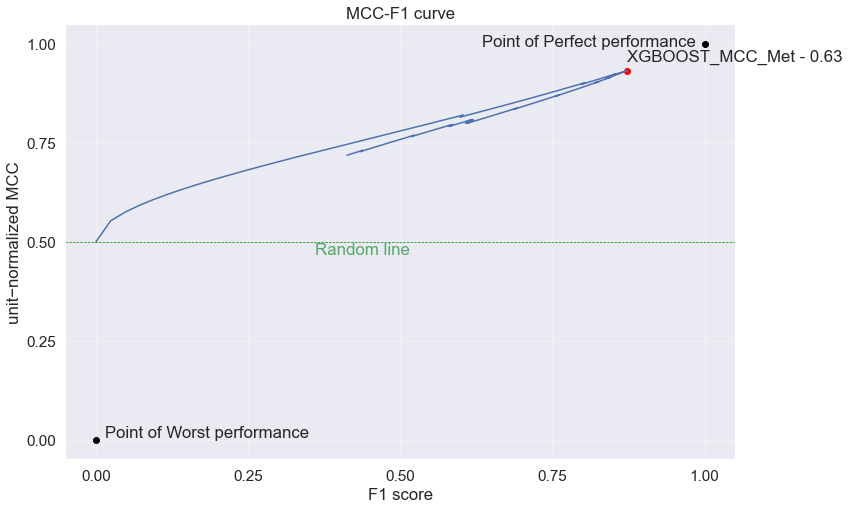

In [44]:
plotting(mcc,f1, thresholds, MCC_F1_Met, 239, total_plots = 1,ax = 1, classifer_name ='XGBOOST')

In [45]:
threshold = 0.33
new_pred = []
for i in probability:
    if i > threshold:
        new_pred.append(1)
    else:
        new_pred.append(0)

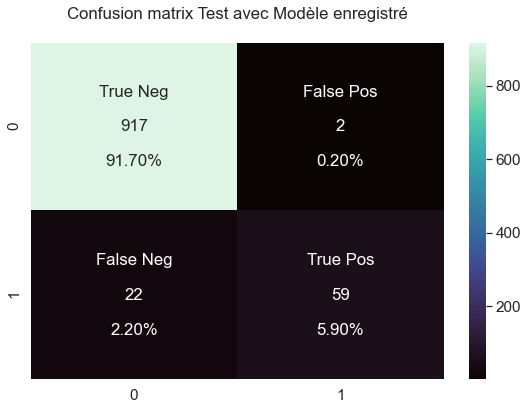

In [41]:
# Matrice de confusion avec y_pred standard:
plt.figure(figsize=(8,6))
df_cm = confusion_matrix(y_valid, y_pred) 
group_names = ["True Neg\n", "False Pos\n", "False Neg\n", "True Pos\n"]
group_counts = ["{0:0.0f}\n".format(value) for value in df_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in df_cm.flatten()/np.sum(df_cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=labels, fmt="", cmap='mako').set_title('Confusion matrix Test avec Mod√®le enregistr√©\n')
class_names=[0,1]
tick_marks = np.arange(len(class_names))

plt.tight_layout()
plt.show()

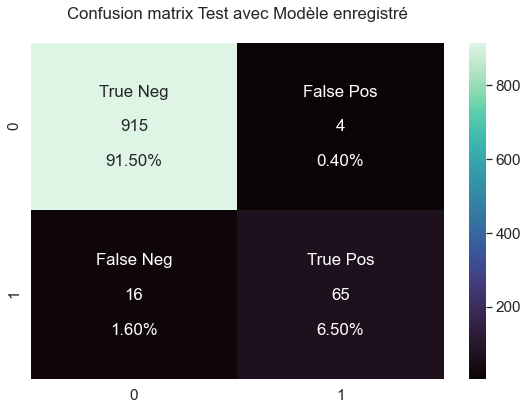

In [47]:
# Matrice de confusion avec la nouvelle pr√©diction seuil:
plt.figure(figsize=(8,6))
df_cm = confusion_matrix(y_valid, new_pred) 
group_names = ["True Neg\n", "False Pos\n", "False Neg\n", "True Pos\n"]
group_counts = ["{0:0.0f}\n".format(value) for value in df_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in df_cm.flatten()/np.sum(df_cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=labels, fmt="", cmap='mako').set_title('Confusion matrix Test avec Mod√®le enregistr√©\n')
class_names=[0,1]
tick_marks = np.arange(len(class_names))

plt.tight_layout()
plt.show()

In [46]:
new_recall = metrics.recall_score(y_valid, new_pred)
classic_recall = metrics.recall_score(y_valid, y_pred)
print(f'Recall standard : {classic_recall}\nNouveau Recall : {new_recall}')

Recall standard : 0.7283950617283951
Nouveau Recall : 0.8024691358024691


In [48]:
new_MCC = metrics.matthews_corrcoef(y_valid, new_pred)
classic_MCC = metrics.matthews_corrcoef(y_valid, y_pred)
print(f'MCC standard : {classic_MCC}\nNouveau MCC : {new_MCC}')

MCC standard : 0.8278850286622041
Nouveau MCC : 0.8591464727921904


Le seuil permet d'am√©liorer le score *Recall* et de diminuer les Faux N√©gatifs. Toutefois, la part de Faux Positif augmente. Dans le cadre de ce projet, seul la probabilit√© de pr√©diction est retenue mais cette √©tude reste pertinente si on se focalise sur les scores *MCC/F1*.